In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# pathlib 好用的路径管理工具
import pathlib
from tensorflow import keras

In [3]:
data_dir = './dataset/2_class'

In [4]:
# 目录路径
data_root = pathlib.Path(data_dir)

In [5]:
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [6]:
# glob('*/*)提取目录下所有对象，正则表达式
all_image_path = list(data_root.glob('*/*'))

In [7]:
len(all_image_path)

1400

In [8]:
all_image_path[:3]

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [9]:
all_image_path[-3:]

[WindowsPath('dataset/2_class/lake/lake_698.jpg'),
 WindowsPath('dataset/2_class/lake/lake_699.jpg'),
 WindowsPath('dataset/2_class/lake/lake_700.jpg')]

In [10]:
# 去掉WindowPath
all_image_path = [str(path) for path in all_image_path]

In [11]:
all_image_path[10:12]

['dataset\\2_class\\airplane\\airplane_011.jpg',
 'dataset\\2_class\\airplane\\airplane_012.jpg']

In [12]:
# 因为前700是airplane，后700是lake，要对图片乱序
import random

In [13]:
random.shuffle(all_image_path)

In [14]:
all_image_path[10:12]

['dataset\\2_class\\airplane\\airplane_688.jpg',
 'dataset\\2_class\\lake\\lake_658.jpg']

In [15]:
#所有图片数
image_count = len(all_image_path)
image_count

1400

In [16]:
#文字分类编码

#提取所有分类目录,再进行sorted()排序
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

In [17]:
label_names

['airplane', 'lake']

In [18]:
#将label文字转换成编码,dict()字典形式,这种写法在多分类很有用
label_to_index = dict((name, index) for index, name in enumerate(label_names))

In [19]:
# ?enumerate
# enumerate is useful for obtaining an indexed list:   (0, seq[0]), (1, seq[1]), (2, seq[2]), ...

In [20]:
label_to_index

{'airplane': 0, 'lake': 1}

In [21]:
all_image_path[:3]

['dataset\\2_class\\lake\\lake_004.jpg',
 'dataset\\2_class\\lake\\lake_306.jpg',
 'dataset\\2_class\\airplane\\airplane_023.jpg']

In [22]:
# 对路径提取label
pathlib.Path('dataset\\2_class\\lake\\airplane_646.jpg').parent.name

'lake'

In [23]:
# 对所有图片路径进行提取，取出对应label，并把label转化成对应编码数字
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [24]:
all_image_label[:5]

[1, 1, 0, 1, 1]

In [25]:
# 确认是否对应正确
all_image_path[:5]

['dataset\\2_class\\lake\\lake_004.jpg',
 'dataset\\2_class\\lake\\lake_306.jpg',
 'dataset\\2_class\\airplane\\airplane_023.jpg',
 'dataset\\2_class\\lake\\lake_419.jpg',
 'dataset\\2_class\\lake\\lake_358.jpg']

In [26]:
# 看一下图片
import IPython.display as display

In [27]:
# 将label和index调换一下位置
index_to_label = dict((v,k) for k,v in label_to_index.items())

In [28]:
index_to_label 

{0: 'airplane', 1: 'lake'}

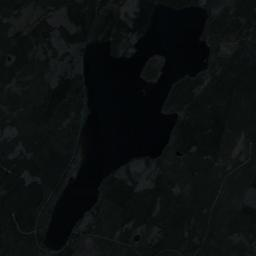

lake



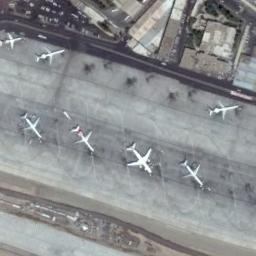

airplane



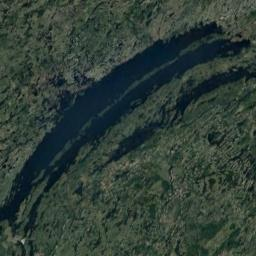

lake



In [29]:
for n in range(3):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])
    print()

In [30]:
# 单张图片演示
img_path = all_image_path[0]

In [31]:
img_path

'dataset\\2_class\\lake\\lake_004.jpg'

In [32]:
# tf.Tensor 数据类型，载入图片二进制形式
img_raw = tf.io.read_file(img_path)

In [33]:
img_raw

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\

In [34]:
# 解码图像
img_tensor = tf.image.decode_image(img_raw)

In [35]:
img_tensor.shape

TensorShape([256, 256, 3])

In [36]:
img_tensor.dtype

tf.uint8

In [37]:
img_tensor

<tf.Tensor: id=14, shape=(256, 256, 3), dtype=uint8, numpy=
array([[[ 63,  97,  60],
        [ 55,  89,  52],
        [ 54,  88,  53],
        ...,
        [ 25,  56,  38],
        [ 46,  77,  61],
        [ 55,  87,  72]],

       [[ 63,  97,  60],
        [ 54,  88,  51],
        [ 56,  90,  55],
        ...,
        [ 13,  42,  22],
        [ 31,  62,  46],
        [ 27,  60,  43]],

       [[ 54,  89,  49],
        [ 52,  86,  49],
        [ 69, 103,  68],
        ...,
        [ 30,  58,  36],
        [ 35,  64,  46],
        [ 12,  43,  25]],

       ...,

       [[ 52,  76,  44],
        [ 57,  81,  49],
        [ 93, 117,  85],
        ...,
        [ 28,  49,  32],
        [ 23,  46,  28],
        [  8,  31,  13]],

       [[ 78, 102,  70],
        [ 57,  81,  49],
        [ 75,  98,  69],
        ...,
        [ 35,  56,  39],
        [ 41,  62,  43],
        [ 13,  34,  15]],

       [[ 79, 103,  71],
        [ 41,  65,  33],
        [ 49,  72,  43],
        ...,
        [ 27, 

In [38]:
# 图片标准化
# tf.cast()转化数据类型，浮点型
img_tensor = tf.cast(img_tensor, tf.float32)

In [39]:
img_tensor = img_tensor/255

In [40]:
img_tensor.numpy()

array([[[0.24705882, 0.38039216, 0.23529412],
        [0.21568628, 0.34901962, 0.20392157],
        [0.21176471, 0.34509805, 0.20784314],
        ...,
        [0.09803922, 0.21960784, 0.14901961],
        [0.18039216, 0.3019608 , 0.23921569],
        [0.21568628, 0.34117648, 0.28235295]],

       [[0.24705882, 0.38039216, 0.23529412],
        [0.21176471, 0.34509805, 0.2       ],
        [0.21960784, 0.3529412 , 0.21568628],
        ...,
        [0.05098039, 0.16470589, 0.08627451],
        [0.12156863, 0.24313726, 0.18039216],
        [0.10588235, 0.23529412, 0.16862746]],

       [[0.21176471, 0.34901962, 0.19215687],
        [0.20392157, 0.3372549 , 0.19215687],
        [0.27058825, 0.40392157, 0.26666668],
        ...,
        [0.11764706, 0.22745098, 0.14117648],
        [0.13725491, 0.2509804 , 0.18039216],
        [0.04705882, 0.16862746, 0.09803922]],

       ...,

       [[0.20392157, 0.29803923, 0.17254902],
        [0.22352941, 0.31764707, 0.19215687],
        [0.3647059 , 0

In [41]:
img_tensor.numpy().max()

0.96862745

In [42]:
img_tensor.numpy().min()

0.0

In [43]:
# 对上述构造一个预处理函数,读取图片二进制数，解码，转化数据类型，标准化normalize to [0,1] range
# img_tensor = tf.image.decode_image(img_raw)这是一种通用解析图片格式,缺点是不会返回shape,因此这里选择使用tf.image.decode_jpeg(img_raw,channels = 3)
def load_preprosess_image(img_path):
    img_raw = tf.io.read_file(img_path)
    img_tensor = tf.image.decode_jpeg(img_raw,channels = 3)
    img_tensor = tf.image.resize(img_tensor, [256, 256])    # resize_image_with_crop_or_pad这个命令可以让resize不改变大小，但是一般不影响
    img_tensor = tf.cast(img_tensor, tf.float32)
    image = img_tensor/255
    return image

In [44]:
image_path = all_image_path[500]

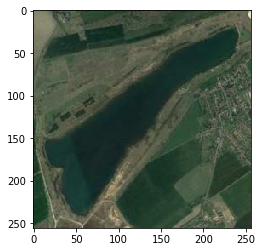

In [45]:
plt.imshow(load_preprosess_image(image_path))

In [46]:
# 构造tf.data的dataset，固定方法
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [47]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [48]:
# map处理路径
image_dataset = path_ds.map(load_preprosess_image)

In [49]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [50]:
# 创建label集固定方法
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [51]:
label_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [52]:
# 查看前10歌label是否正确
for label in label_dataset.take(10):
    print(label.numpy())

1
1
0
1
1
0
1
1
1
1


In [53]:
# 查看图片是否正确
for image in image_dataset.take(1):
    print(image)


tf.Tensor(
[[[0.24705882 0.38039216 0.23529412]
  [0.21568628 0.34901962 0.20392157]
  [0.21176471 0.34509805 0.20784314]
  ...
  [0.09803922 0.21960784 0.14901961]
  [0.18039216 0.3019608  0.23921569]
  [0.21568628 0.34117648 0.28235295]]

 [[0.24705882 0.38039216 0.23529412]
  [0.21176471 0.34509805 0.2       ]
  [0.21960784 0.3529412  0.21568628]
  ...
  [0.05098039 0.16470589 0.08627451]
  [0.12156863 0.24313726 0.18039216]
  [0.10588235 0.23529412 0.16862746]]

 [[0.21176471 0.34901962 0.19215687]
  [0.20392157 0.3372549  0.19215687]
  [0.27058825 0.40392157 0.26666668]
  ...
  [0.11764706 0.22745098 0.14117648]
  [0.13725491 0.2509804  0.18039216]
  [0.04705882 0.16862746 0.09803922]]

 ...

 [[0.20392157 0.29803923 0.17254902]
  [0.22352941 0.31764707 0.19215687]
  [0.3647059  0.45882353 0.33333334]
  ...
  [0.10980392 0.19215687 0.1254902 ]
  [0.09019608 0.18039216 0.10980392]
  [0.03137255 0.12156863 0.05098039]]

 [[0.30588236 0.4        0.27450982]
  [0.22352941 0.31764707 0

In [54]:
# 把img 和 label合并成一个dataset,双括号
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [55]:
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [56]:
# test set 和 train set数量，int()必须为整数
test_count = int(image_count*0.2)
train_count = image_count - test_count

In [57]:
test_count,train_count

(280, 1120)

In [58]:
#skip()方法跳过集合
train_dataset = dataset.skip(test_count)

In [59]:
#take()方法，取出集合
test_dataset = dataset.take(test_count)

In [60]:
# 每次训练32张图片
BATCH_SIZE = 32

In [61]:
# train需要引入乱序,buffer_size是输入一个范围，在这个范围里进行shuffle, 相当于每次从训练集中随机抽样取32张图片，无限重复
train_dataset = train_dataset.shuffle(buffer_size=train_count).batch(BATCH_SIZE).repeat()

In [62]:
# test不需要乱序
test_dataset = test_dataset.batch(BATCH_SIZE)

In [63]:
# 导入神经网络模型 #顺序模型
model = tf.keras.Sequential()  
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))         
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))         
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))         
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))          
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))                                
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))          
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))                 
model.add(tf.keras.layers.Dense(256, activation='relu'))               
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 256)       2

In [65]:
# 编译模型,多分类loss='sparse_categorical_crossentropy',虽然也可以用于二分类
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
)

In [66]:
# 告诉模型每个epoch训练多少步
steps_per_epoch = train_count//BATCH_SIZE   # //除法取整
validation_steps = test_count//BATCH_SIZE

In [67]:
# 训练过程 training processing
history = model.fit(train_dataset, epochs=15, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/15
35/35 [==============================] - 19s 531ms/step - loss: 0.6528 - acc: 0.6339 - val_loss: 0.4535 - val_acc: 0.8359
Epoch 2/15
35/35 [==============================] - 12s 343ms/step - loss: 0.2829 - acc: 0.9045 - val_loss: 0.2313 - val_acc: 0.9414
Epoch 3/15
35/35 [==============================] - 12s 343ms/step - loss: 0.1380 - acc: 0.9571 - val_loss: 0.1188 - val_acc: 0.9648
Epoch 4/15
35/35 [==============================] - 12s 344ms/step - loss: 0.1077 - acc: 0.9679 - val_loss: 0.1105 - val_acc: 0.9688
Epoch 5/15
35/35 [==============================] - 12s 345ms/step - loss: 0.0814 - acc: 0.9750 - val_loss: 0.0832 - val_acc: 0.9766
Epoch 6/15
35/35 [==============================] - 12s 345ms/step - loss: 0.0671 - acc: 0.9795 - val_loss: 0.0818 - val_acc: 0.9766
Epoch 7/15
35/35 [==============================] - 12s 344ms/step - loss: 0.0608 - acc: 0.9821 - val_loss: 0.0673 - val_acc: 0.9805
Epoch 8/15
35/35 [==========

In [68]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

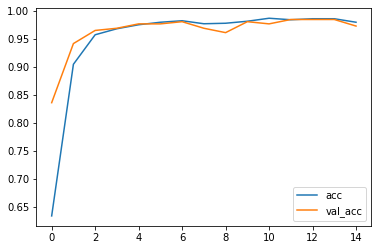

In [69]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

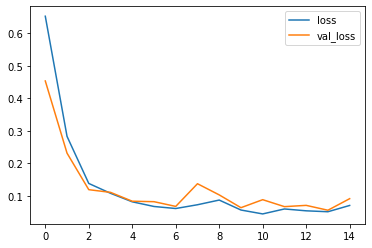

In [70]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

In [71]:
model.save('cnn_model.h5')

In [73]:
new_model = tf.keras.models.load_model('cnn_model.h5')

In [74]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 256)       2

In [168]:
# evaluate the model by test_dataset
new_model.evaluate(test_dataset, verbose=0)

[0.08360655109087627, 0.975]

In [189]:
predict = new_model.predict(test_dataset)
predict

array([[1.00000000e+00],
       [1.00000000e+00],
       [5.03473580e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.00206864e-02],
       [9.99993801e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.17205167e-01],
       [1.00000000e+00],
       [2.08370388e-02],
       [5.87874651e-02],
       [1.00000000e+00],
       [6.45210445e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99479175e-01],
       [5.59264421e-03],
       [7.72576630e-02],
       [9.97538090e-01],
       [7.05909729e-02],
       [7.01462924e-02],
       [1.73611641e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.92623210e-01],
       [6.15985692e-02],
       [1.09272599e-02],
       [9.79934454e-01],
       [1.51808858e-02],
       [1.44039690e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.44379044e-06],
       [1.88674331e-02],
       [9.43583250e-03],
       [1.00000000e+00],


In [173]:
# compare with testdataset
all_image_label[:test_count]

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [190]:
predict[10],all_image_label[10]

(array([0.21720517], dtype=float32), 0)

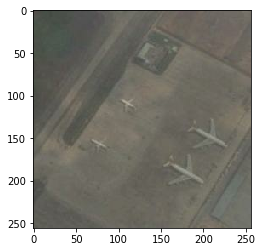

In [192]:
image_path1 = all_image_path[10]
plt.imshow(load_preprosess_image(image_path1))

In [193]:
predict[100],all_image_label[100]

(array([0.06937873], dtype=float32), 0)

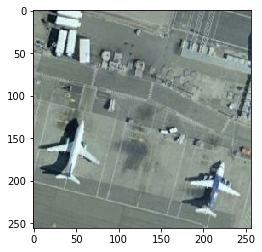

In [194]:
image_path1 = all_image_path[100]
plt.imshow(load_preprosess_image(image_path1))

In [196]:
predict[200],all_image_label[200]

(array([0.9999979], dtype=float32), 1)

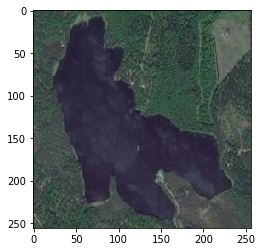

In [197]:
image_path1 = all_image_path[200]
plt.imshow(load_preprosess_image(image_path1))